# 라이브러리 불러오기

In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
import os
import time
from tqdm import tqdm
import rasterio as rio
from rasterio.plot import show
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
from osgeo import gdal, gdal_array
import numpy as np
import shapely
import fiona
from rasterio import plot
from rasterio.mask import mask


# matplotlib 옵션 설정

In [4]:
plt.rcParams["figure.figsize"] = (14,14)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

# 자료 처리시간 계산

In [5]:
current_sec =time.time()
current_sec

1606969836.8270588

In [6]:
tm = time.localtime(current_sec)
print("year:", tm.tm_year)
print("month:", tm.tm_mon)
print("day:", tm.tm_mday)
print("hour:", tm.tm_hour)
print("minute:", tm.tm_min)
print("second:", tm.tm_sec)

year: 2020
month: 12
day: 3
hour: 13
minute: 30
second: 36


In [7]:
time.time()-current_sec

0.037973880767822266

# csv 파일을 이용하여 환경변수 값 추출하기

### 1. 함수정의

In [8]:
def coord2value(csv_file, tif_list, coords):
    start = time.time()
    df = csv_file.copy()
    tif_list = tif_list.copy()
    coord = coords.copy()
    for idx, tif_path in tqdm(enumerate(tif_list)):
        print(idx, tif_path)
        with rio.open(tif_path) as tif:
            df['bio' + str(idx)] = pd.DataFrame([x for x in tif.sample(coord)])
            df['bio' + str(idx) ] = df['bio' + str(idx)].apply(lambda x: float(x))
    print(f"작업시긴은 {time.time()-start}초 걸렸습니다.")
    return df

In [9]:
# for idx, tif_path in tqdm(enumerate(tif_list)):
# #     print(idx, tif)
#     with rio.open(tif_path) as tif:
#         gis['bio' + str(idx)] = pd.DataFrame([x for x in tif.sample(coord)])
#         gis['bio' + str(idx) ] = gis['bio' + str(idx)].apply(lambda x: float(x))

### 2. 환경변수 리스트 불러오기 위한 파일경로 지정

In [10]:
tif_list = glob(r"G:\maxent_work\env\tif_file\*.tif")
len(tif_list)

20

### 3. 생물종 출현지점 csv파일 불러오기

In [11]:
gis = pd.read_csv("data/species3.csv", encoding='euc-kr') # 엑셀프로그램으로 만든 csv파일을 불러올때 반드시 encoding 옵션을 euc-kr로 설정
print(gis.shape)
gis.head()

(82, 3)


,species,lon,lat
0,백부자,128.341556,36.905056
1,백부자,128.344111,36.905611
2,백부자,128.343833,36.905500
3,백부자,128.343861,36.904472
4,백부자,128.343639,36.904528


In [12]:
gis_coords = [(x,y) for x, y in zip(gis.lon, gis.lat)]
gis_coords[:10]

[(128.341556, 36.905056),
 (128.3441111, 36.90561111),
 (128.3438333, 36.9055),
 (128.3438611, 36.90447222),
 (128.3436389, 36.90452778),
 (128.5038333, 37.259305600000005),
 (128.5031111, 37.2598333),
 (128.50411110000002, 37.259305600000005),
 (128.50297220000002, 37.2598333),
 (128.5027778, 37.2600833)]

### 4. 생물종 위치에 해당하는 환경변수 값 추출하기

In [13]:
gis_val = coord2value(gis, tif_list, gis_coords)

4it [00:00, 38.16it/s]

0 G:\maxent_work\env\tif_file\alt_overzero.tif
1 G:\maxent_work\env\tif_file\bio_01.tif
2 G:\maxent_work\env\tif_file\bio_02.tif
3 G:\maxent_work\env\tif_file\bio_03.tif
4 G:\maxent_work\env\tif_file\bio_04.tif
5 G:\maxent_work\env\tif_file\bio_05.tif
6 G:\maxent_work\env\tif_file\bio_06.tif
7 G:\maxent_work\env\tif_file\bio_07.tif
8 G:\maxent_work\env\tif_file\bio_08.tif


14it [00:00, 41.91it/s]

9 G:\maxent_work\env\tif_file\bio_09.tif
10 G:\maxent_work\env\tif_file\bio_10.tif
11 G:\maxent_work\env\tif_file\bio_11.tif
12 G:\maxent_work\env\tif_file\bio_12.tif
13 G:\maxent_work\env\tif_file\bio_13.tif
14 G:\maxent_work\env\tif_file\bio_14.tif
15 G:\maxent_work\env\tif_file\bio_15.tif
16 G:\maxent_work\env\tif_file\bio_16.tif
17 G:\maxent_work\env\tif_file\bio_17.tif
18 G:\maxent_work\env\tif_file\bio_18.tif


20it [00:00, 45.49it/s]

19 G:\maxent_work\env\tif_file\bio_19.tif
작업시긴은 0.44563746452331543초 걸렸습니다.


In [62]:
gis_val.head()

,species,lon,lat,bio0,bio1,bio2,bio3,bio4,bio5,bio6,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,백부자,128.341556,36.905056,409.0,98.0,220.0,29.0,9788.0,280.0,-105.0,...,220.0,-34.0,1284.0,305.0,26.0,81.0,713.0,87.0,713.0,87.0
1,백부자,128.344111,36.905611,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
2,백부자,128.343833,36.905500,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
3,백부자,128.343861,36.904472,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
4,백부자,128.343639,36.904528,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0


### 5. 대상지역 배경지점 csv파일 불러오기

In [15]:
bg = pd.read_csv("data/background_pt.csv", encoding='euc-kr')
print(bg.shape)
bg.head()

(10000, 5)


,x,y,raw,cumulative,Logistic
0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04
1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03
2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08
3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02
4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04


In [16]:
bg_coords = [(x, y) for x,y in zip(bg.x, bg.y)]
print(len(bg_coords))
bg_coords[:10]

10000


[(85.10428874, 41.88762207),
 (119.06262209999998, 32.4209554),
 (88.0459554, 23.9459554),
 (117.6209554, 29.8459554),
 (62.36262207, 53.06262207),
 (139.8459554, 37.1709554),
 (84.8709554, 37.10428874),
 (76.28762207, 55.4709554),
 (92.68762207, 35.9709554),
 (125.58762209999999, 39.5959554)]

### 6. 대상지점 위치에 해당하는 환경변수 값 추출하기

In [53]:
bg_val = coord2value(bg, tif_list, bg_coords)

0it [00:00, ?it/s]

0 G:\maxent_work\env\tif_file\alt_overzero.tif


1it [00:02,  2.91s/it]

1 G:\maxent_work\env\tif_file\bio_01.tif


2it [00:04,  2.53s/it]

2 G:\maxent_work\env\tif_file\bio_02.tif


3it [00:06,  2.26s/it]

3 G:\maxent_work\env\tif_file\bio_03.tif


4it [00:07,  2.09s/it]

4 G:\maxent_work\env\tif_file\bio_04.tif


5it [00:09,  1.97s/it]

5 G:\maxent_work\env\tif_file\bio_05.tif


6it [00:11,  1.85s/it]

6 G:\maxent_work\env\tif_file\bio_06.tif


7it [00:12,  1.79s/it]

7 G:\maxent_work\env\tif_file\bio_07.tif


8it [00:14,  1.75s/it]

8 G:\maxent_work\env\tif_file\bio_08.tif


9it [00:16,  1.71s/it]

9 G:\maxent_work\env\tif_file\bio_09.tif


10it [00:17,  1.68s/it]

10 G:\maxent_work\env\tif_file\bio_10.tif


11it [00:19,  1.68s/it]

11 G:\maxent_work\env\tif_file\bio_11.tif


12it [00:21,  1.69s/it]

12 G:\maxent_work\env\tif_file\bio_12.tif


13it [00:22,  1.68s/it]

13 G:\maxent_work\env\tif_file\bio_13.tif


14it [00:24,  1.71s/it]

14 G:\maxent_work\env\tif_file\bio_14.tif


15it [00:26,  1.69s/it]

15 G:\maxent_work\env\tif_file\bio_15.tif


16it [00:27,  1.71s/it]

16 G:\maxent_work\env\tif_file\bio_16.tif


17it [00:29,  1.71s/it]

17 G:\maxent_work\env\tif_file\bio_17.tif


18it [00:31,  1.73s/it]

18 G:\maxent_work\env\tif_file\bio_18.tif


19it [00:33,  1.71s/it]

19 G:\maxent_work\env\tif_file\bio_19.tif


20it [00:34,  1.74s/it]

작업시긴은 34.71519708633423초 걸렸습니다.


In [54]:
bg_val.head()

,x,y,raw,cumulative,Logistic,bio0,bio1,bio2,bio3,bio4,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04,918.0,108.0,247.0,27.0,12015.0,...,247.0,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0
1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03,52.0,152.0,267.0,24.0,9154.0,...,267.0,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0
2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08,24.0,264.0,306.0,42.0,4234.0,...,306.0,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0
3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02,280.0,159.0,262.0,24.0,8382.0,...,262.0,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0
4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04,213.0,28.0,193.0,22.0,13614.0,...,193.0,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0


In [69]:
bio_var = pd.DataFrame()

for idx, tif_path in tqdm(enumerate(tif_list)):
    print(idx, tif_path)
    bio = rio.open(tif_path)
    bio_array = bio.read()
    reshaped_array = bio_array.reshape([1,-1])
    transposed_array = reshaped_array.T    
    bio_var['bio' + str(idx)] = pd.DataFrame(transposed_array)[0]
    bio.close()

0it [00:00, ?it/s]

0 G:\maxent_work\env\tif_file\alt_overzero.tif


1it [00:07,  8.00s/it]

1 G:\maxent_work\env\tif_file\bio_01.tif


2it [00:08,  5.80s/it]

2 G:\maxent_work\env\tif_file\bio_02.tif


3it [00:09,  4.25s/it]

3 G:\maxent_work\env\tif_file\bio_03.tif


4it [00:09,  3.15s/it]

4 G:\maxent_work\env\tif_file\bio_04.tif


5it [00:10,  2.38s/it]

5 G:\maxent_work\env\tif_file\bio_05.tif


6it [00:11,  1.85s/it]

6 G:\maxent_work\env\tif_file\bio_06.tif


7it [00:11,  1.48s/it]

7 G:\maxent_work\env\tif_file\bio_07.tif


8it [00:12,  1.24s/it]

8 G:\maxent_work\env\tif_file\bio_08.tif


9it [00:13,  1.06s/it]

9 G:\maxent_work\env\tif_file\bio_09.tif


10it [00:13,  1.07it/s]

10 G:\maxent_work\env\tif_file\bio_10.tif


11it [00:14,  1.20it/s]

11 G:\maxent_work\env\tif_file\bio_11.tif


12it [00:14,  1.30it/s]

12 G:\maxent_work\env\tif_file\bio_12.tif


13it [00:15,  1.41it/s]

13 G:\maxent_work\env\tif_file\bio_13.tif


14it [00:16,  1.48it/s]

14 G:\maxent_work\env\tif_file\bio_14.tif


15it [00:16,  1.53it/s]

15 G:\maxent_work\env\tif_file\bio_15.tif


16it [00:17,  1.58it/s]

16 G:\maxent_work\env\tif_file\bio_16.tif


17it [00:17,  1.58it/s]

17 G:\maxent_work\env\tif_file\bio_17.tif


18it [00:18,  1.58it/s]

18 G:\maxent_work\env\tif_file\bio_18.tif


19it [00:19,  1.62it/s]

19 G:\maxent_work\env\tif_file\bio_19.tif


20it [00:19,  1.02it/s]


In [48]:
bio_var

,bio_0,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77759995,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
77759996,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
77759997,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
77759998,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [50]:
bio_over_zero = bio_var[bio_var['bio_0'] > 0]

In [52]:
bio_over_zero.describe()

,bio_0,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
count,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07,4.349277e+07
mean,1.052303e+03,7.505362e+01,1.995531e+02,3.226152e+01,1.017892e+04,2.731677e+02,-1.341300e+02,4.072977e+02,1.746418e+02,-2.084693e+01,1.995531e+02,-6.193591e+01,6.953012e+02,1.425729e+02,1.290258e+01,7.907772e+01,3.658623e+02,4.749850e+01,2.703465e+02,7.393446e+01
std,1.286668e+03,1.128171e+02,7.311895e+01,1.388634e+01,4.573184e+03,7.325608e+01,1.699751e+02,1.300441e+02,7.551771e+01,1.807807e+02,7.311895e+01,1.661661e+02,6.972723e+02,1.430022e+02,2.679261e+01,3.028088e+01,3.655765e+02,8.934846e+01,2.461792e+02,1.614511e+02
min,1.000000e+00,-2.270000e+02,-1.260000e+02,1.500000e+01,9.400000e+01,-8.000000e+01,-4.920000e+02,6.200000e+01,-2.400000e+02,-4.140000e+02,-1.260000e+02,-4.210000e+02,1.300000e+01,3.000000e+00,0.000000e+00,9.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.990000e+02,-1.400000e+01,1.510000e+02,2.300000e+01,7.013000e+03,2.320000e+02,-2.540000e+02,3.200000e+02,1.300000e+02,-1.630000e+02,1.510000e+02,-1.820000e+02,2.630000e+02,5.600000e+01,2.000000e+00,5.300000e+01,1.370000e+02,8.000000e+00,1.030000e+02,1.300000e+01
50%,5.720000e+02,4.400000e+01,1.950000e+02,2.700000e+01,1.109900e+04,2.680000e+02,-1.880000e+02,4.360000e+02,1.750000e+02,-8.600000e+01,1.950000e+02,-1.090000e+02,4.610000e+02,9.500000e+01,5.000000e+00,8.200000e+01,2.420000e+02,2.400000e+01,2.100000e+02,3.800000e+01
75%,1.277000e+03,1.650000e+02,2.600000e+02,3.900000e+01,1.359700e+04,3.230000e+02,9.000000e+00,4.970000e+02,2.350000e+02,1.760000e+02,2.600000e+02,6.600000e+01,8.580000e+02,1.880000e+02,1.300000e+01,1.020000e+02,4.710000e+02,4.800000e+01,3.530000e+02,6.400000e+01
max,8.233000e+03,2.930000e+02,3.710000e+02,9.600000e+01,2.127900e+04,4.620000e+02,2.470000e+02,7.010000e+02,3.710000e+02,3.610000e+02,3.710000e+02,2.750000e+02,1.140100e+04,2.949000e+03,3.090000e+02,1.740000e+02,8.019000e+03,1.046000e+03,6.090000e+03,5.162000e+03


In [45]:
alt_0 = bio_var[bio_var['var0'] > 0]['var0']

In [49]:
alt_0.mean()

1052.3026338790876

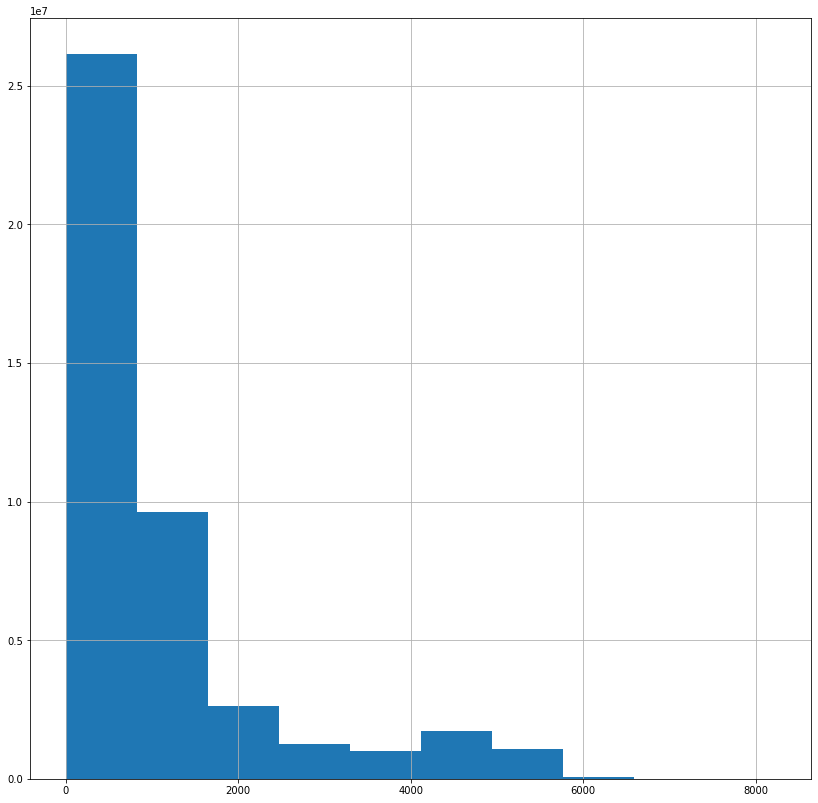

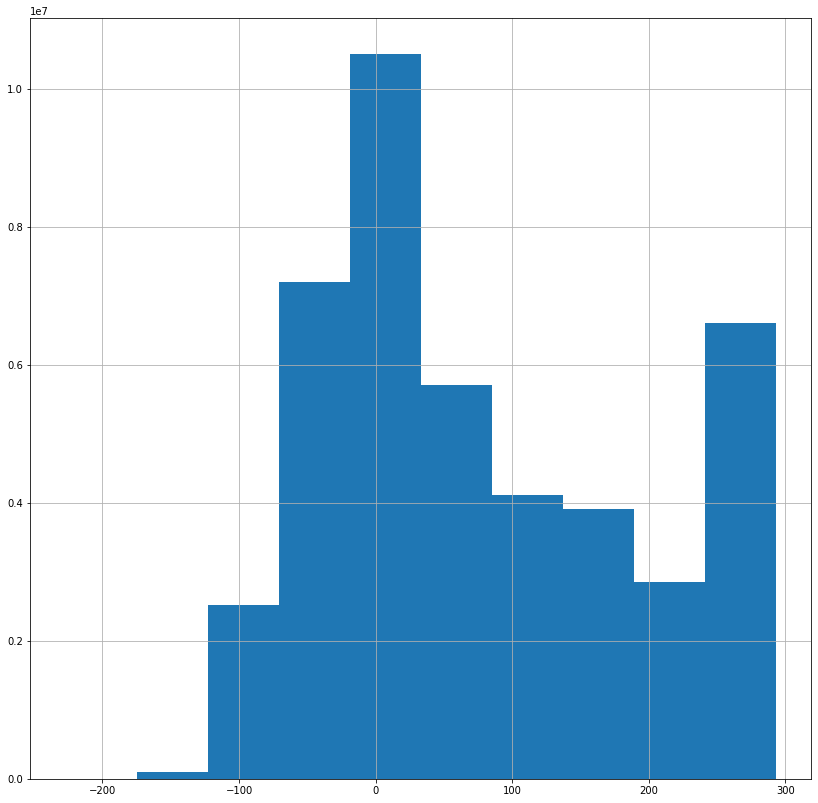

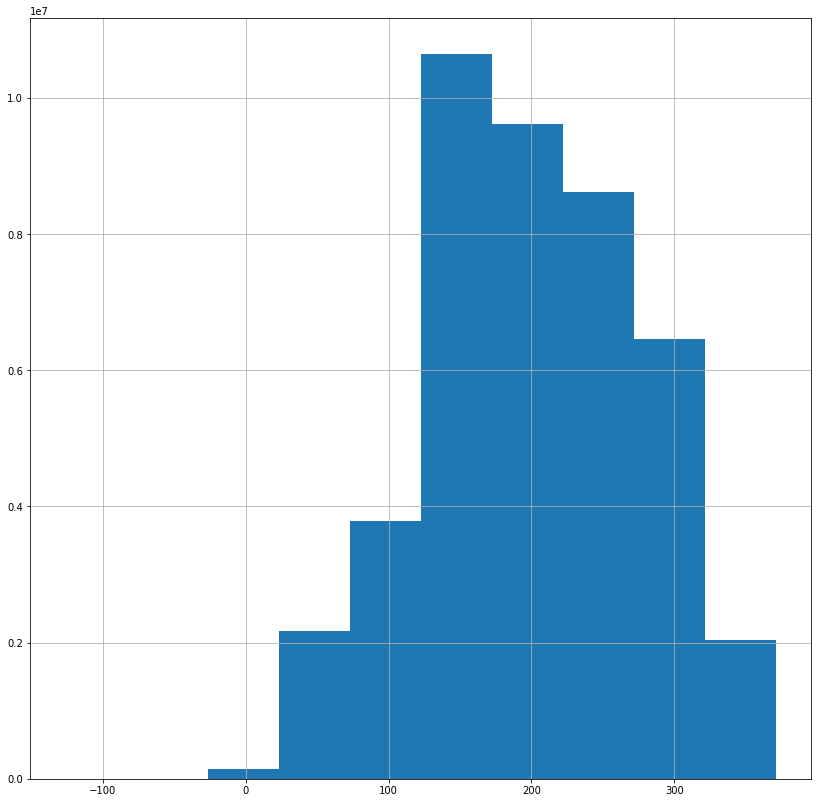

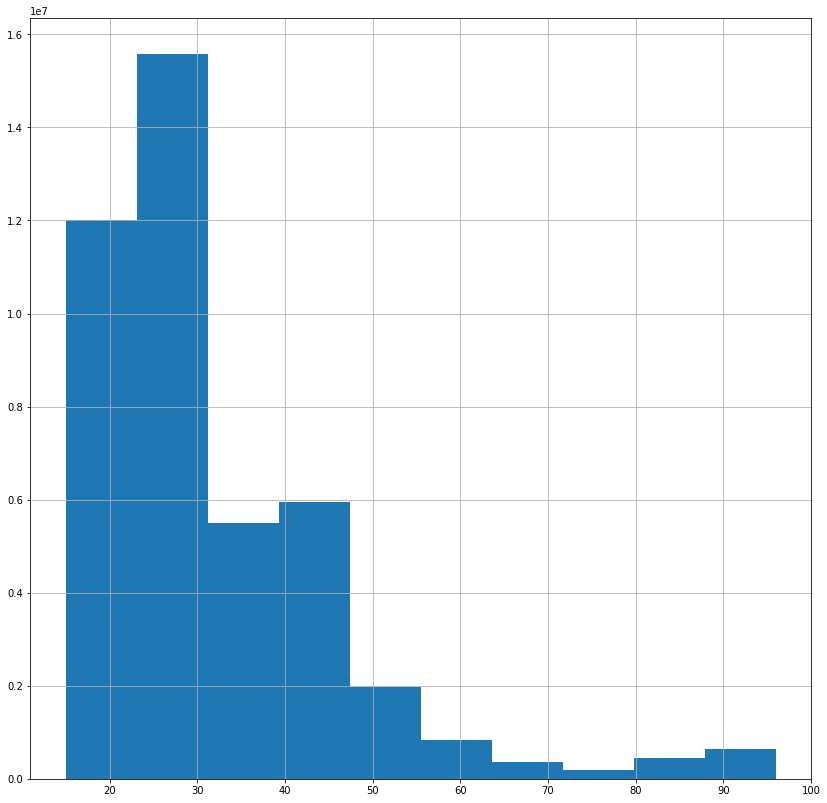

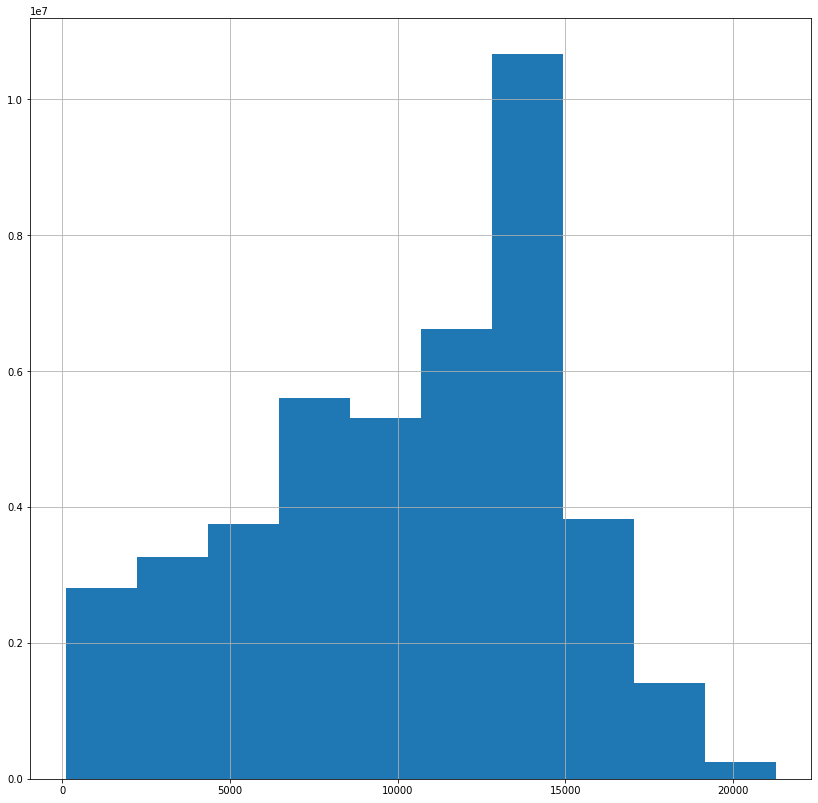

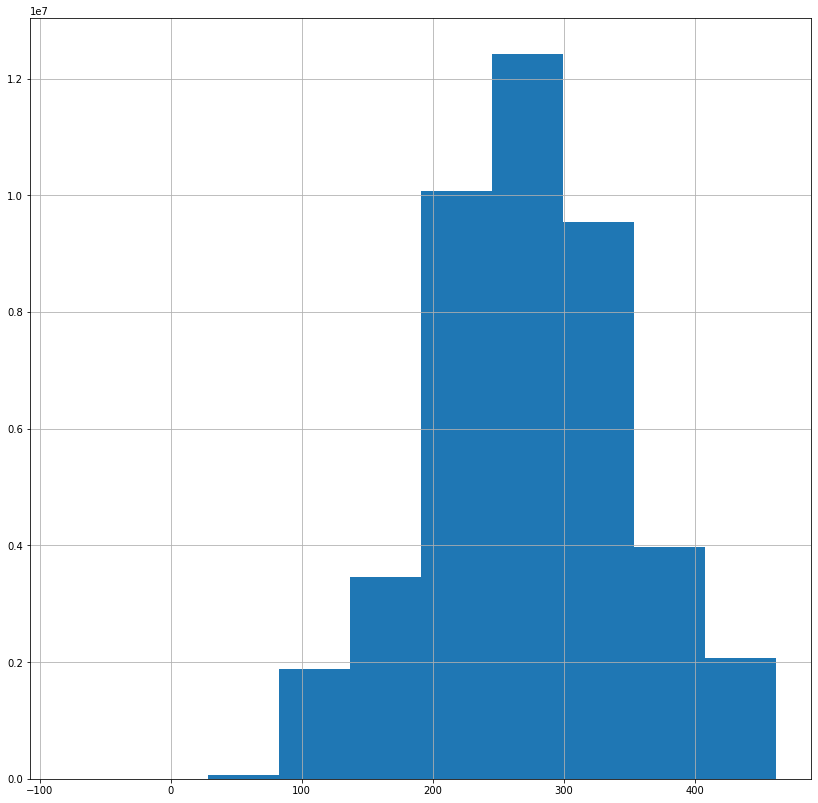

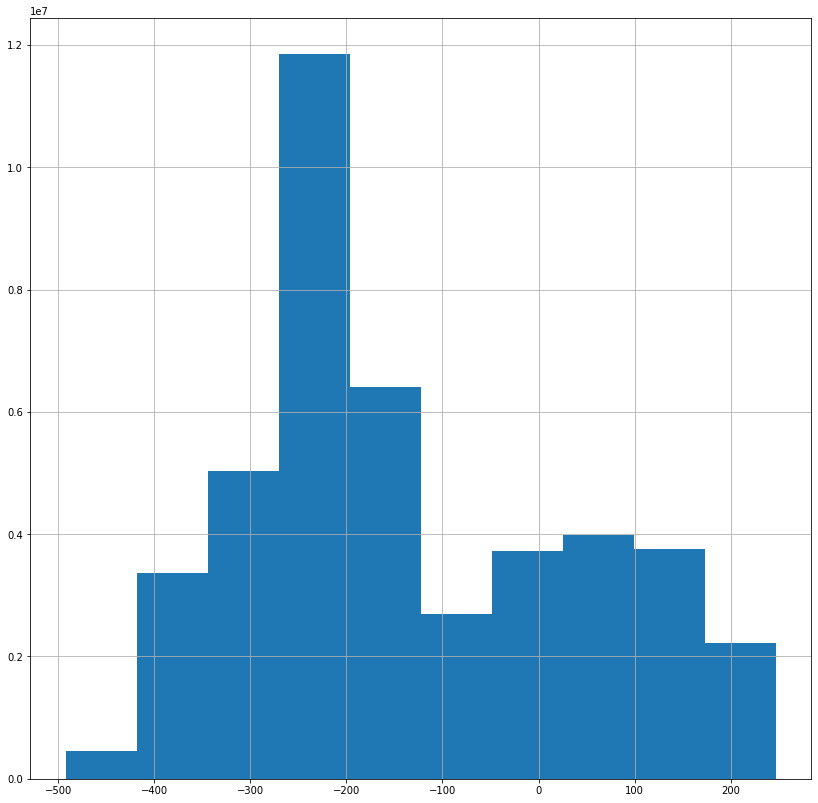

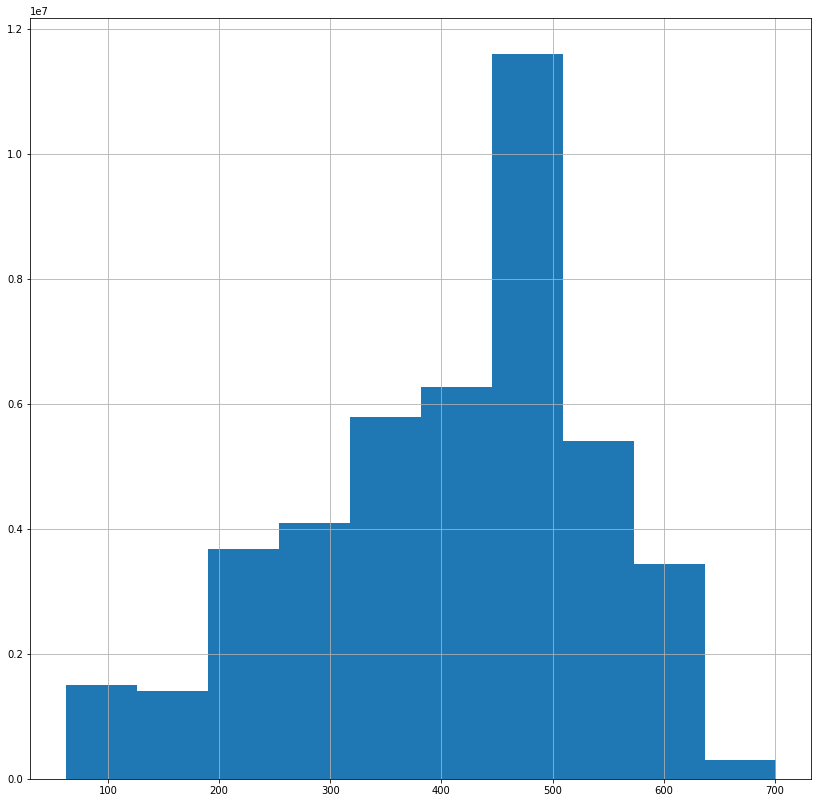

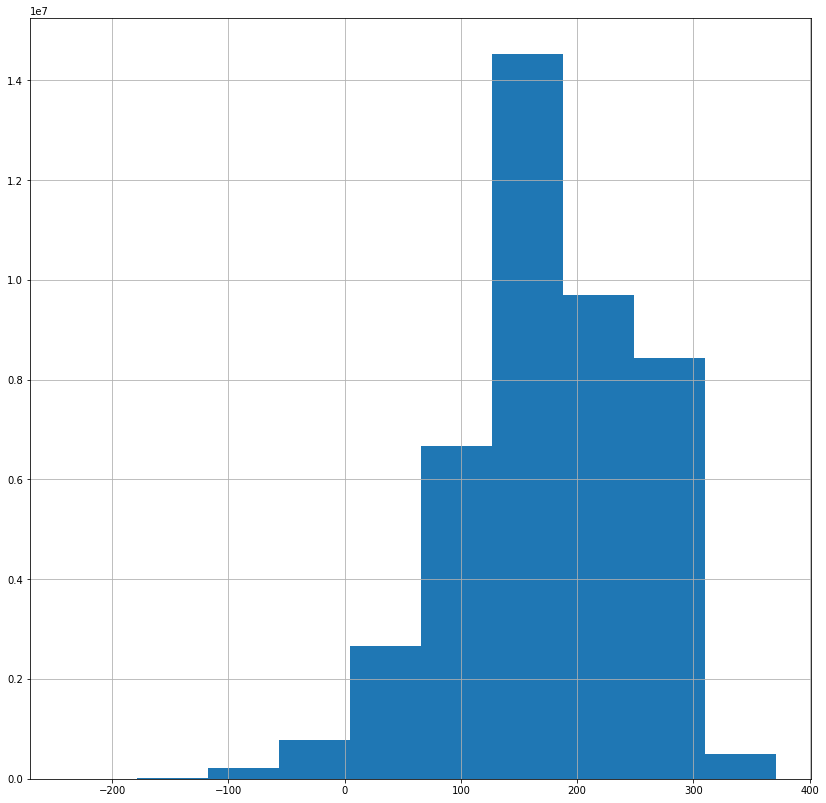

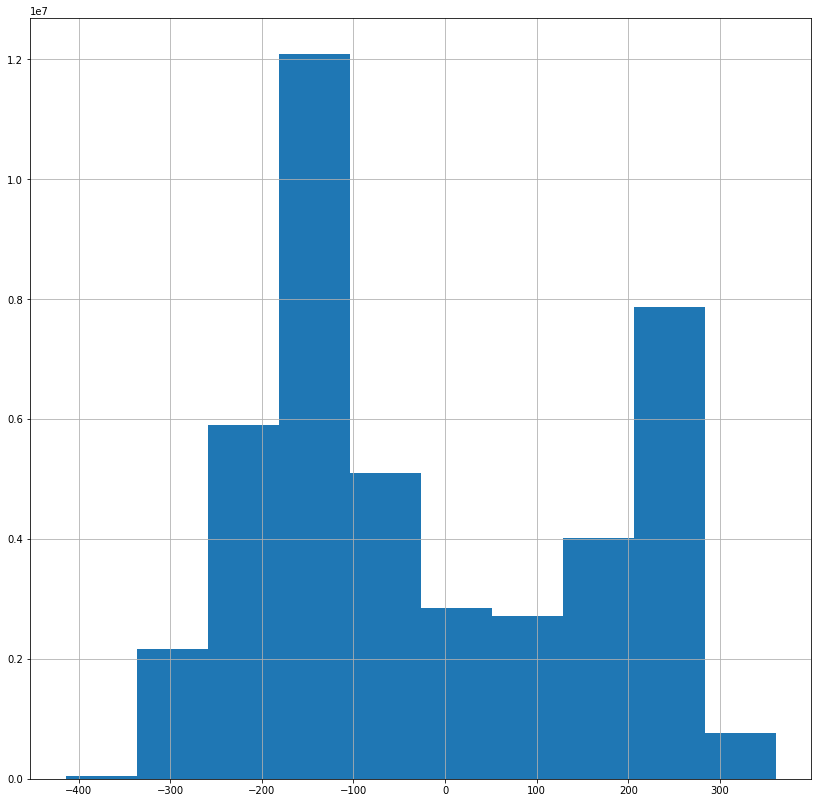

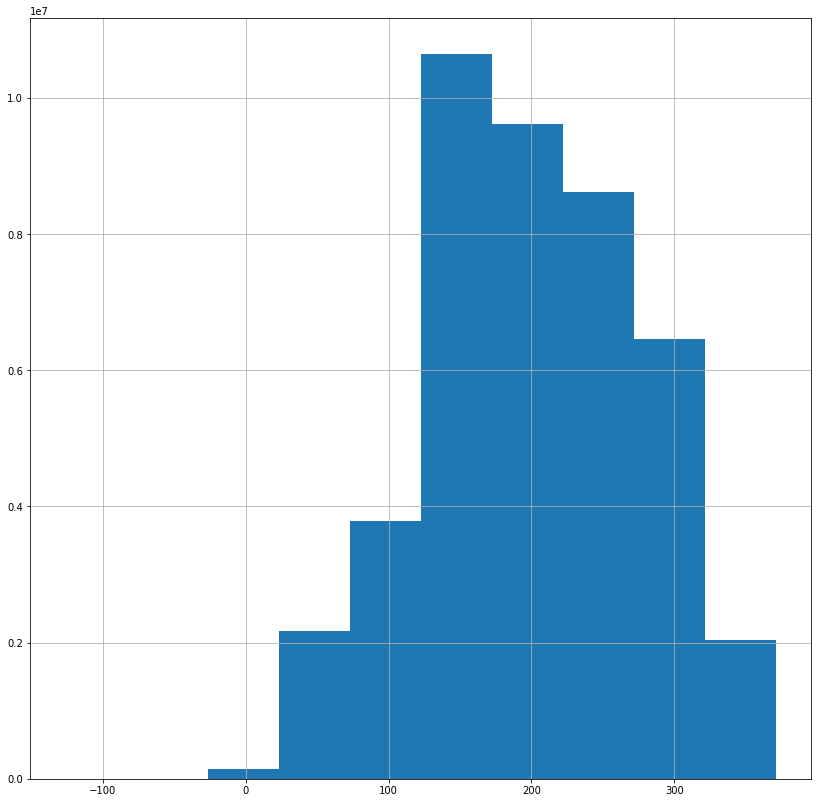

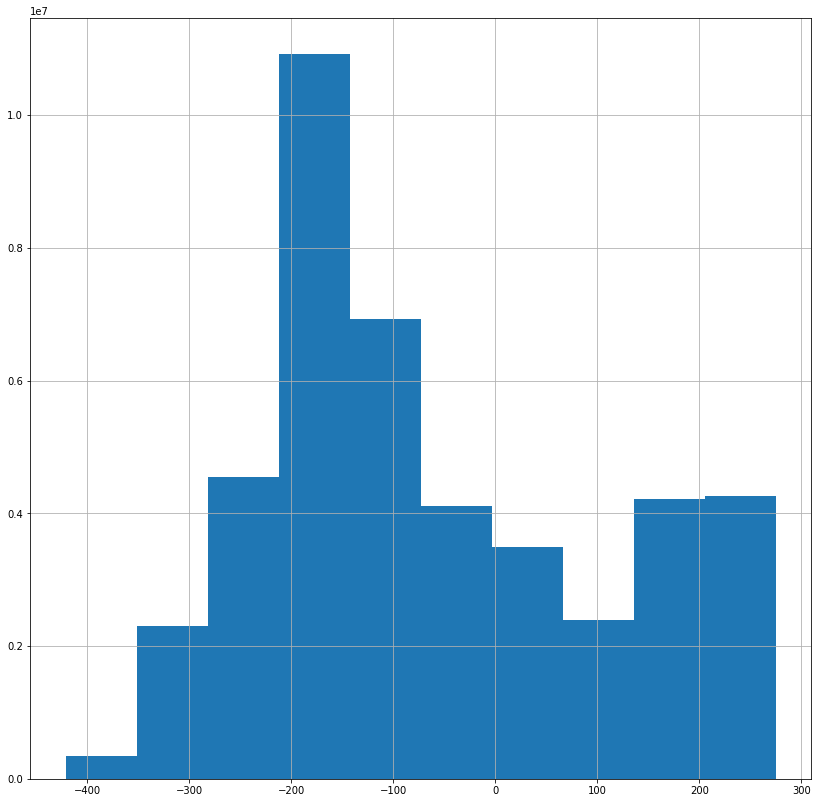

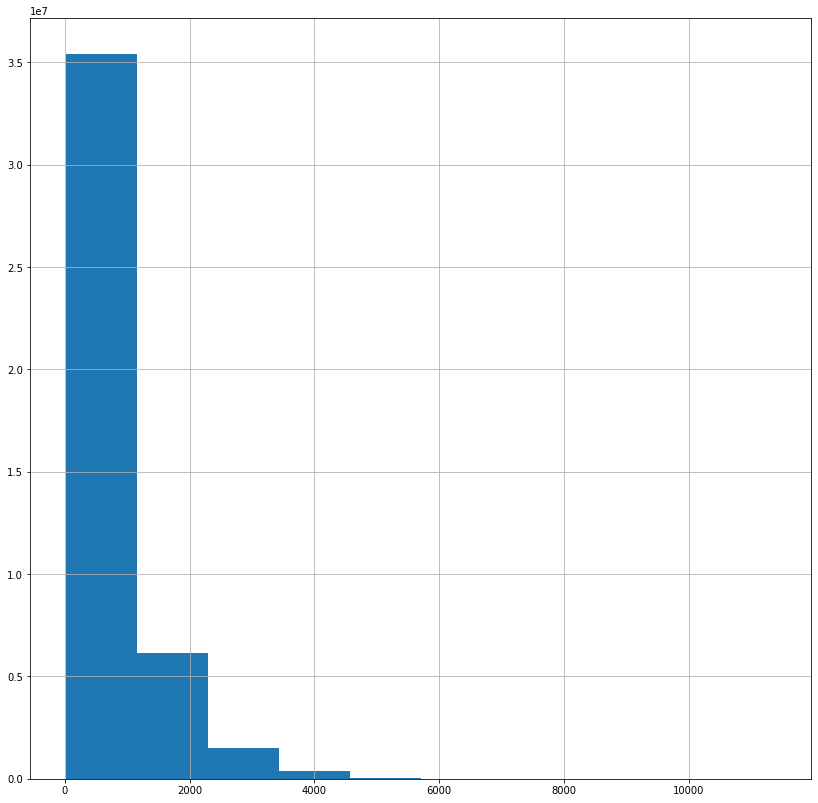

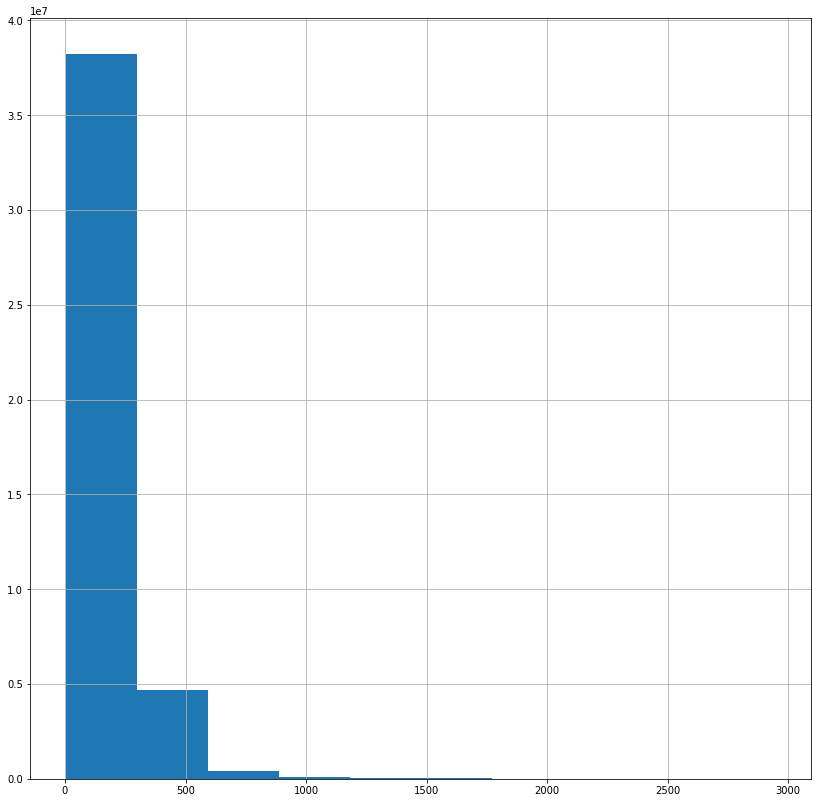

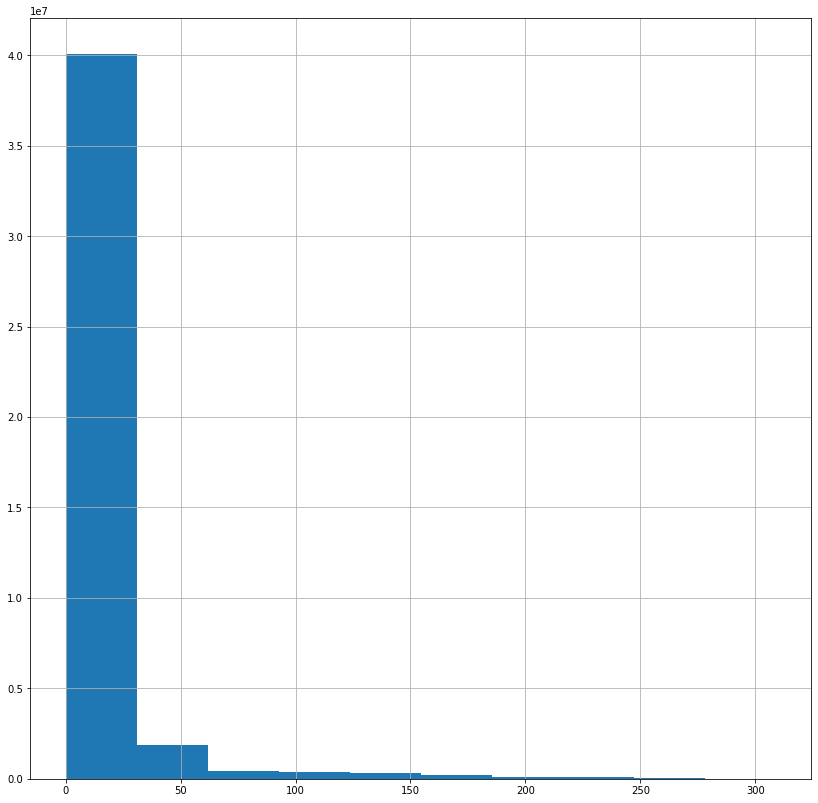

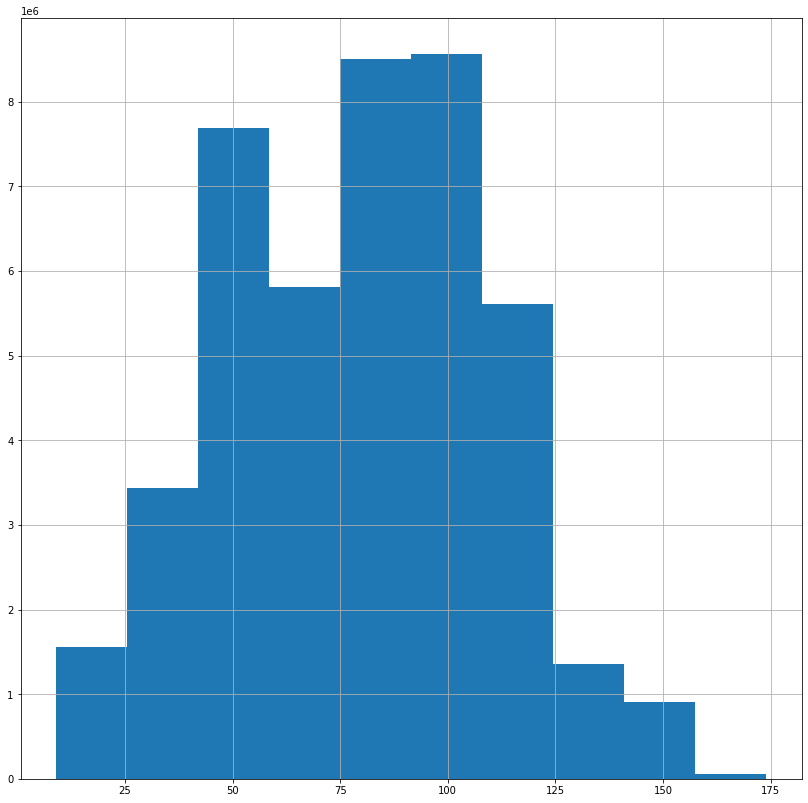

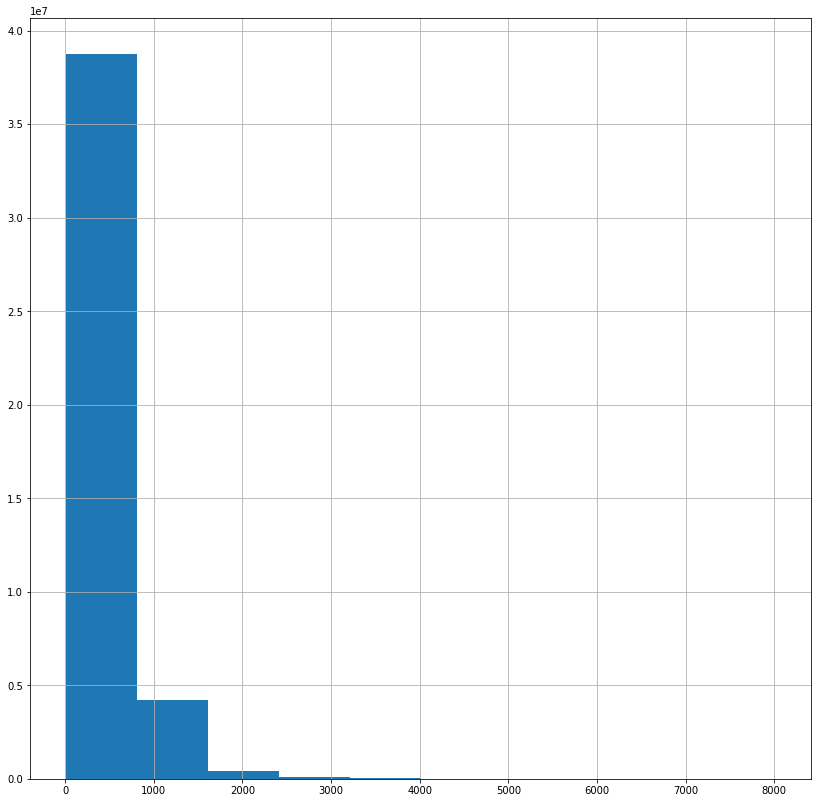

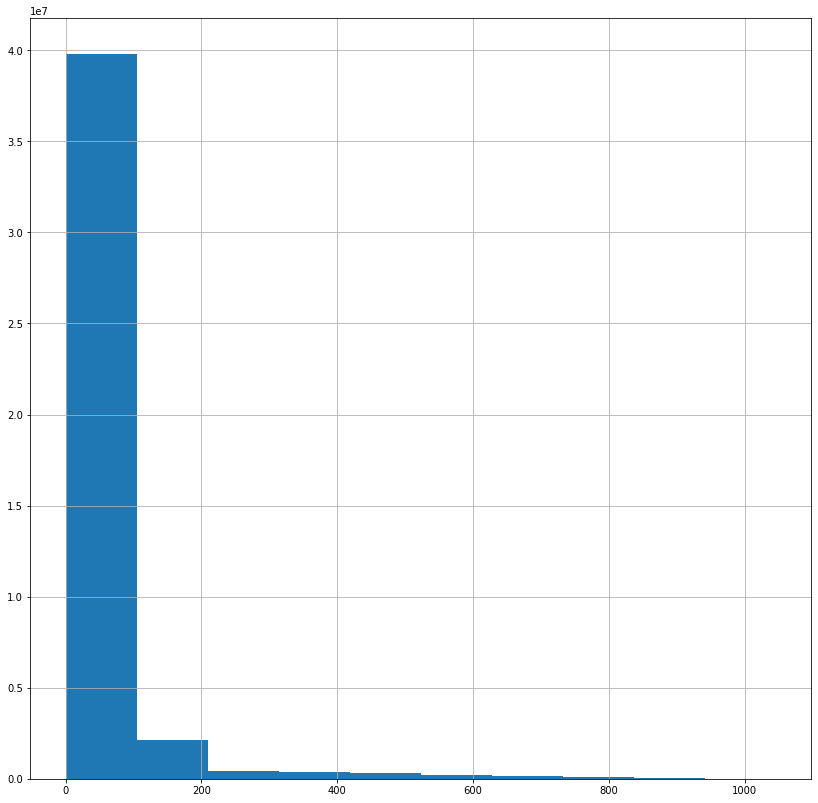

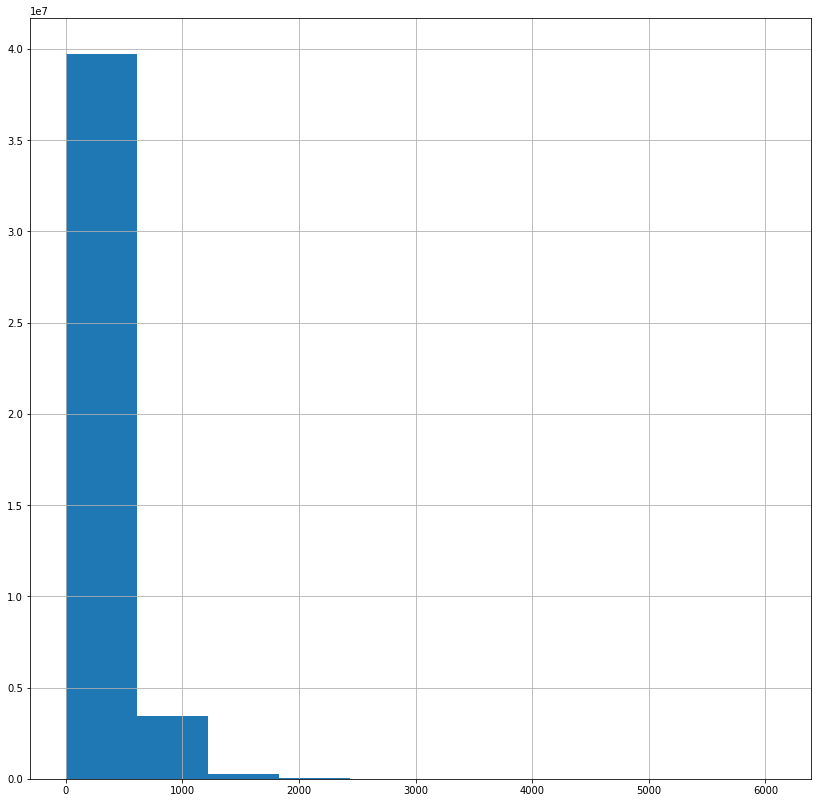

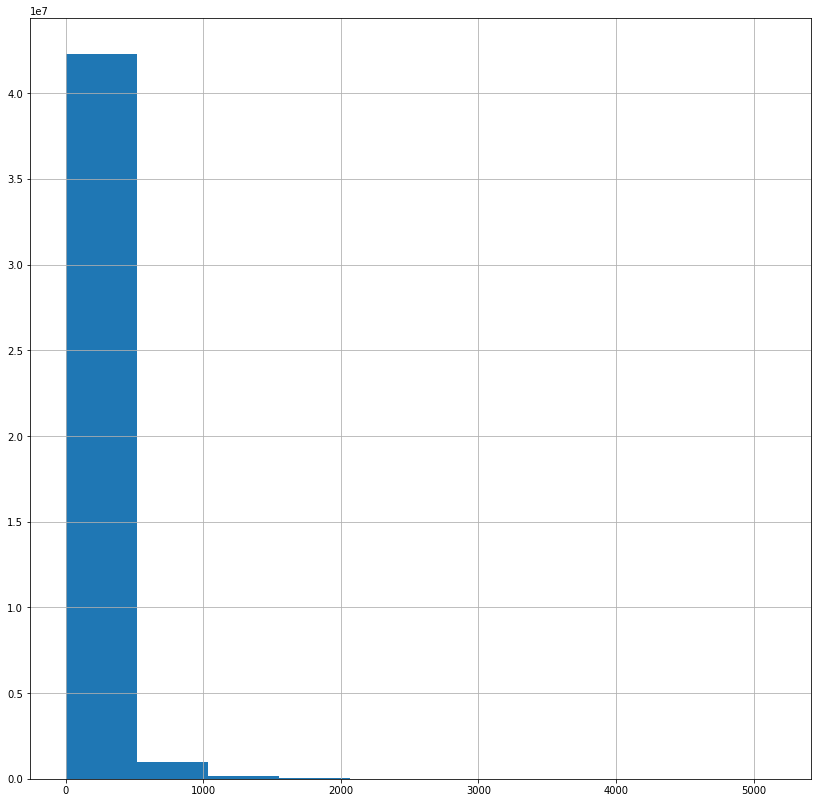

In [59]:
for col in bio_over_zero.columns:
    bio_over_zero[col].hist()
    plt.show()

In [91]:
gis_val['target']=1
gis_val

,species,lon,lat,bio0,bio1,bio2,bio3,bio4,bio5,bio6,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,target
0,백부자,128.341556,36.905056,409.0,98.0,220.0,29.0,9788.0,280.0,-105.0,...,-34.0,1284.0,305.0,26.0,81.0,713.0,87.0,713.0,87.0,1
1,백부자,128.344111,36.905611,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0,1
2,백부자,128.343833,36.905500,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0,1
3,백부자,128.343861,36.904472,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0,1
4,백부자,128.343639,36.904528,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,...,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,지네발란,126.877004,34.159250,85.0,139.0,239.0,25.0,7769.0,286.0,-5.0,...,39.0,1539.0,260.0,32.0,64.0,756.0,129.0,679.0,133.0,1
78,지네발란,127.503917,34.423020,219.0,132.0,234.0,27.0,8102.0,288.0,-27.0,...,26.0,1652.0,283.0,30.0,66.0,813.0,122.0,724.0,126.0,1
79,지네발란,127.503917,34.421940,219.0,132.0,234.0,27.0,8102.0,288.0,-27.0,...,26.0,1652.0,283.0,30.0,66.0,813.0,122.0,724.0,126.0,1
80,지네발란,127.503861,34.421700,219.0,132.0,234.0,27.0,8102.0,288.0,-27.0,...,26.0,1652.0,283.0,30.0,66.0,813.0,122.0,724.0,126.0,1


In [74]:
gis_val['species'].unique()

array(['백부자', '솔붓꽃', '지네발란'], dtype=object)

In [75]:
gis_val['species'].value_counts()

솔붓꽃     42
백부자     26
지네발란    14
Name: species, dtype: int64

In [85]:
bg_val['target']=0
bg_val

,x,y,raw,cumulative,Logistic,bio0,bio1,bio2,bio3,bio4,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,target
0,85.104289,41.887622,2.510000e-06,0.270932,3.019090e-04,918.0,108.0,247.0,27.0,12015.0,...,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0,0
1,119.062622,32.420955,2.250000e-05,3.365033,2.694573e-03,52.0,152.0,267.0,24.0,9154.0,...,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0,0
2,88.045955,23.945955,1.600000e-10,0.000004,1.900000e-08,24.0,264.0,306.0,42.0,4234.0,...,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0,0
3,117.620955,29.845955,1.940000e-04,10.188135,2.275907e-02,280.0,159.0,262.0,24.0,8382.0,...,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0,0
4,62.362622,53.062622,3.400000e-06,0.435249,4.082210e-04,213.0,28.0,193.0,22.0,13614.0,...,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100.087622,35.495955,3.200000e-05,4.228693,3.827290e-03,2746.0,40.0,145.0,37.0,8964.0,...,-83.0,337.0,72.0,1.0,92.0,196.0,5.0,196.0,5.0,0
9996,80.762622,54.654289,2.870000e-06,0.336615,3.441540e-04,153.0,8.0,175.0,22.0,13435.0,...,-168.0,376.0,60.0,12.0,46.0,159.0,44.0,159.0,51.0,0
9997,66.904289,37.029289,6.260000e-08,0.001248,7.517000e-06,302.0,175.0,296.0,34.0,9331.0,...,54.0,167.0,42.0,0.0,98.0,97.0,0.0,0.0,77.0,0
9998,68.604289,36.287622,4.270000e-07,0.021426,5.126100e-05,776.0,148.0,262.0,35.0,8898.0,...,31.0,316.0,69.0,0.0,91.0,185.0,0.0,0.0,113.0,0


In [70]:
bio_var

,bio0,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77759995,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
77759996,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
77759997,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
77759998,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [72]:
X = gis_val.iloc[:, 3:-1]
X

,bio0,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,409.0,98.0,220.0,29.0,9788.0,280.0,-105.0,385.0,220.0,-34.0,220.0,-34.0,1284.0,305.0,26.0,81.0,713.0,87.0,713.0,87.0
1,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,384.0,228.0,-25.0,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
2,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,384.0,228.0,-25.0,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
3,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,384.0,228.0,-25.0,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
4,270.0,107.0,228.0,29.0,9742.0,288.0,-96.0,384.0,228.0,-25.0,228.0,-25.0,1230.0,292.0,24.0,82.0,683.0,81.0,683.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,85.0,139.0,239.0,25.0,7769.0,286.0,-5.0,291.0,234.0,62.0,239.0,39.0,1539.0,260.0,32.0,64.0,756.0,129.0,679.0,133.0
78,219.0,132.0,234.0,27.0,8102.0,288.0,-27.0,315.0,231.0,49.0,234.0,26.0,1652.0,283.0,30.0,66.0,813.0,122.0,724.0,126.0
79,219.0,132.0,234.0,27.0,8102.0,288.0,-27.0,315.0,231.0,49.0,234.0,26.0,1652.0,283.0,30.0,66.0,813.0,122.0,724.0,126.0
80,219.0,132.0,234.0,27.0,8102.0,288.0,-27.0,315.0,231.0,49.0,234.0,26.0,1652.0,283.0,30.0,66.0,813.0,122.0,724.0,126.0


In [120]:
X_sol = gis_val[gis_val['species']=='솔붓꽃'].iloc[:, 3:]
X_sol

,bio0,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,target
26,45.0,111.0,232.0,25.0,9965.0,290.0,-94.0,384.0,231.0,-24.0,...,-24.0,1232.0,337.0,15.0,97.0,753.0,59.0,738.0,59.0,1
27,26.0,112.0,234.0,25.0,9970.0,291.0,-92.0,383.0,232.0,-23.0,...,-23.0,1222.0,334.0,15.0,97.0,746.0,59.0,731.0,59.0,1
28,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
29,26.0,112.0,234.0,25.0,9970.0,291.0,-92.0,383.0,232.0,-23.0,...,-23.0,1222.0,334.0,15.0,97.0,746.0,59.0,731.0,59.0,1
30,7.0,112.0,234.0,24.0,9934.0,291.0,-90.0,381.0,232.0,-21.0,...,-21.0,1200.0,327.0,15.0,95.0,729.0,58.0,717.0,58.0,1
31,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
32,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
33,85.0,116.0,233.0,27.0,9413.0,293.0,-69.0,362.0,231.0,-8.0,...,-8.0,1214.0,271.0,28.0,77.0,659.0,93.0,638.0,93.0,1
34,83.0,115.0,232.0,25.0,9453.0,290.0,-68.0,358.0,231.0,-10.0,...,-10.0,1191.0,274.0,26.0,79.0,656.0,86.0,633.0,86.0,1
35,77.0,130.0,243.0,30.0,9028.0,300.0,-56.0,356.0,243.0,10.0,...,10.0,1057.0,218.0,19.0,73.0,553.0,75.0,553.0,75.0,1


In [122]:
bg_sol =  bg_val.iloc[:,5:]
bg_sol

,bio0,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,target
0,918.0,108.0,247.0,27.0,12015.0,322.0,-138.0,460.0,247.0,-43.0,...,-62.0,67.0,15.0,1.0,83.0,40.0,4.0,40.0,4.0,0
1,52.0,152.0,267.0,24.0,9154.0,317.0,-18.0,335.0,267.0,33.0,...,33.0,979.0,204.0,30.0,61.0,464.0,104.0,464.0,104.0,0
2,24.0,264.0,306.0,42.0,4234.0,380.0,117.0,263.0,295.0,199.0,...,199.0,1424.0,446.0,1.0,118.0,1005.0,22.0,320.0,22.0,0
3,280.0,159.0,262.0,24.0,8382.0,315.0,-2.0,317.0,199.0,67.0,...,47.0,1669.0,287.0,47.0,54.0,748.0,167.0,594.0,205.0,0
4,213.0,28.0,193.0,22.0,13614.0,271.0,-210.0,481.0,193.0,-137.0,...,-151.0,341.0,59.0,13.0,44.0,140.0,43.0,140.0,52.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2746.0,40.0,145.0,37.0,8964.0,223.0,-192.0,415.0,145.0,-83.0,...,-83.0,337.0,72.0,1.0,92.0,196.0,5.0,196.0,5.0,0
9996,153.0,8.0,175.0,22.0,13435.0,256.0,-224.0,480.0,175.0,-149.0,...,-168.0,376.0,60.0,12.0,46.0,159.0,44.0,159.0,51.0,0
9997,302.0,175.0,296.0,34.0,9331.0,388.0,-12.0,400.0,74.0,296.0,...,54.0,167.0,42.0,0.0,98.0,97.0,0.0,0.0,77.0,0
9998,776.0,148.0,262.0,35.0,8898.0,360.0,-33.0,393.0,96.0,262.0,...,31.0,316.0,69.0,0.0,91.0,185.0,0.0,0.0,113.0,0


In [125]:
X_bg_sol_all = pd.concat([X_sol, bg_sol ], axis=0)

In [126]:
X_bg_sol_all

,bio0,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,target
26,45.0,111.0,232.0,25.0,9965.0,290.0,-94.0,384.0,231.0,-24.0,...,-24.0,1232.0,337.0,15.0,97.0,753.0,59.0,738.0,59.0,1
27,26.0,112.0,234.0,25.0,9970.0,291.0,-92.0,383.0,232.0,-23.0,...,-23.0,1222.0,334.0,15.0,97.0,746.0,59.0,731.0,59.0,1
28,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
29,26.0,112.0,234.0,25.0,9970.0,291.0,-92.0,383.0,232.0,-23.0,...,-23.0,1222.0,334.0,15.0,97.0,746.0,59.0,731.0,59.0,1
30,7.0,112.0,234.0,24.0,9934.0,291.0,-90.0,381.0,232.0,-21.0,...,-21.0,1200.0,327.0,15.0,95.0,729.0,58.0,717.0,58.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2746.0,40.0,145.0,37.0,8964.0,223.0,-192.0,415.0,145.0,-83.0,...,-83.0,337.0,72.0,1.0,92.0,196.0,5.0,196.0,5.0,0
9996,153.0,8.0,175.0,22.0,13435.0,256.0,-224.0,480.0,175.0,-149.0,...,-168.0,376.0,60.0,12.0,46.0,159.0,44.0,159.0,51.0,0
9997,302.0,175.0,296.0,34.0,9331.0,388.0,-12.0,400.0,74.0,296.0,...,54.0,167.0,42.0,0.0,98.0,97.0,0.0,0.0,77.0,0
9998,776.0,148.0,262.0,35.0,8898.0,360.0,-33.0,393.0,96.0,262.0,...,31.0,316.0,69.0,0.0,91.0,185.0,0.0,0.0,113.0,0


### 7. 모델 수행

In [127]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [139]:
# create dataset
# X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)

X = X_bg_sol_all.iloc[:, :-1]
X[:10]

,bio0,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
26,45.0,111.0,232.0,25.0,9965.0,290.0,-94.0,384.0,231.0,-24.0,232.0,-24.0,1232.0,337.0,15.0,97.0,753.0,59.0,738.0,59.0
27,26.0,112.0,234.0,25.0,9970.0,291.0,-92.0,383.0,232.0,-23.0,234.0,-23.0,1222.0,334.0,15.0,97.0,746.0,59.0,731.0,59.0
28,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
29,26.0,112.0,234.0,25.0,9970.0,291.0,-92.0,383.0,232.0,-23.0,234.0,-23.0,1222.0,334.0,15.0,97.0,746.0,59.0,731.0,59.0
30,7.0,112.0,234.0,24.0,9934.0,291.0,-90.0,381.0,232.0,-21.0,234.0,-21.0,1200.0,327.0,15.0,95.0,729.0,58.0,717.0,58.0
31,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
32,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
33,85.0,116.0,233.0,27.0,9413.0,293.0,-69.0,362.0,231.0,-8.0,233.0,-8.0,1214.0,271.0,28.0,77.0,659.0,93.0,638.0,93.0
34,83.0,115.0,232.0,25.0,9453.0,290.0,-68.0,358.0,231.0,-10.0,232.0,-10.0,1191.0,274.0,26.0,79.0,656.0,86.0,633.0,86.0
35,77.0,130.0,243.0,30.0,9028.0,300.0,-56.0,356.0,243.0,10.0,243.0,10.0,1057.0,218.0,19.0,73.0,553.0,75.0,553.0,75.0


In [140]:
y=X_bg_sol_all.iloc[:, -1]
y[:10]

26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
Name: target, dtype: int64

>1, train: 0.996, test: 0.997
>2, train: 0.996, test: 0.997
>3, train: 0.996, test: 0.997
>4, train: 0.998, test: 0.997
>5, train: 0.999, test: 0.997
>6, train: 1.000, test: 0.998
>7, train: 1.000, test: 0.997
>8, train: 1.000, test: 0.997
>9, train: 1.000, test: 0.998
>10, train: 1.000, test: 0.997
>11, train: 1.000, test: 0.998
>12, train: 1.000, test: 0.997
>13, train: 1.000, test: 0.997
>14, train: 1.000, test: 0.998
>15, train: 1.000, test: 0.997
>16, train: 1.000, test: 0.998
>17, train: 1.000, test: 0.998
>18, train: 1.000, test: 0.997
>19, train: 1.000, test: 0.998
>20, train: 1.000, test: 0.998
>21, train: 1.000, test: 0.998
>22, train: 1.000, test: 0.997
>23, train: 1.000, test: 0.998
>24, train: 1.000, test: 0.998


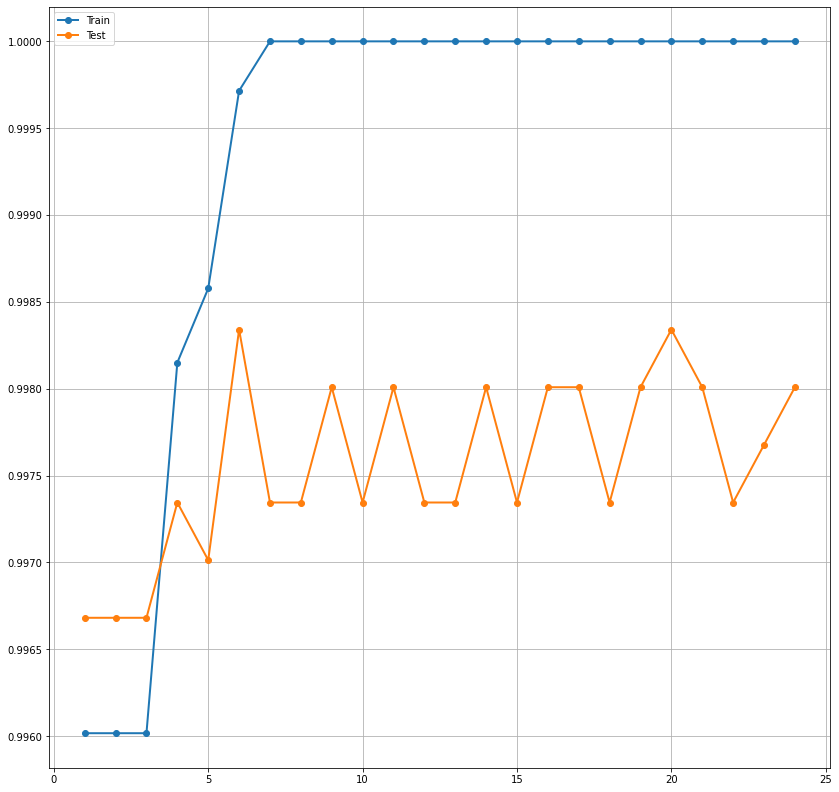

In [141]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 25)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [142]:
pred = model.predict(bio_var)

In [143]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

>1, train: 1.000, test: 0.999
>2, train: 1.000, test: 0.998
>3, train: 0.999, test: 0.997
>4, train: 0.999, test: 0.998
>5, train: 0.999, test: 0.997
>6, train: 0.999, test: 0.997
>7, train: 0.998, test: 0.997
>8, train: 0.998, test: 0.997
>9, train: 0.998, test: 0.997
>10, train: 0.998, test: 0.997
>11, train: 0.997, test: 0.997
>12, train: 0.998, test: 0.997
>13, train: 0.998, test: 0.996
>14, train: 0.998, test: 0.996
>15, train: 0.997, test: 0.996
>16, train: 0.998, test: 0.996
>17, train: 0.997, test: 0.996
>18, train: 0.997, test: 0.996
>19, train: 0.997, test: 0.996
>20, train: 0.998, test: 0.996
>21, train: 0.998, test: 0.996
>22, train: 0.997, test: 0.996
>23, train: 0.997, test: 0.996
>24, train: 0.997, test: 0.996
>25, train: 0.997, test: 0.996
>26, train: 0.997, test: 0.996
>27, train: 0.997, test: 0.996
>28, train: 0.997, test: 0.996
>29, train: 0.997, test: 0.996
>30, train: 0.997, test: 0.996
>31, train: 0.997, test: 0.996
>32, train: 0.997, test: 0.996
>33, train: 0.997

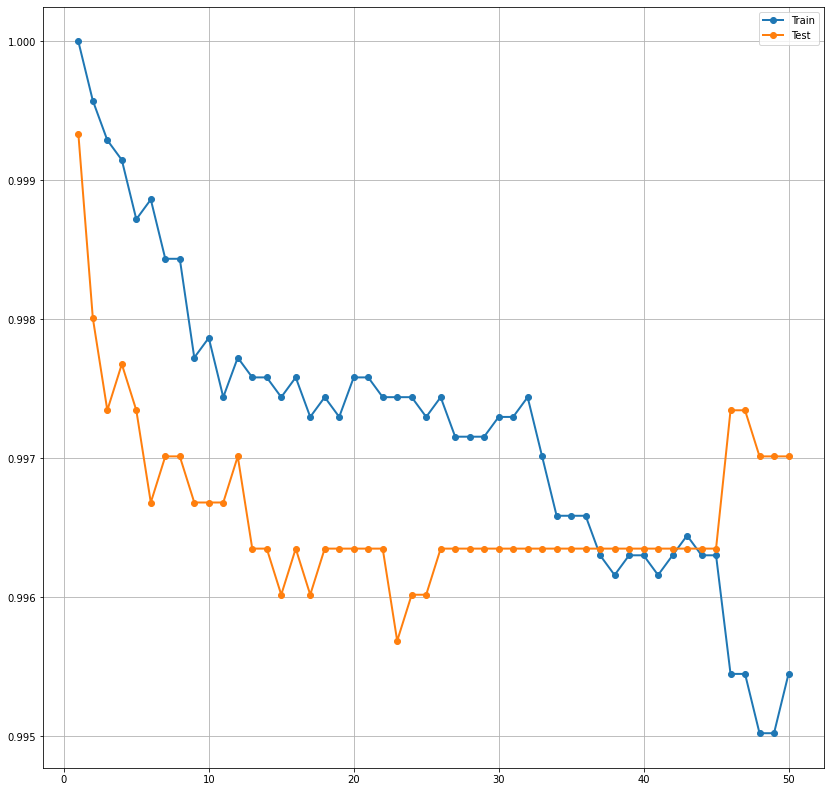

In [144]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
# X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()